## Máquinas de soporte vectorial (SVM)

Es un algoritmo de aprendizaje supervisado donde el objetivo es maximizar el margen definido por la distancia entre el hiperplano de separación y los puntos (de los datos de entrenamiento) más cercanas al hiperplano. Estos puntos son denominados _vectores soporte_.

La idea que hay detrás de las SVM de _margen máximo_ consiste en seleccionar el hiperplano separador que está a la misma distancia de los puntos más cercanos de cada clase.

In [1]:
import sys
from IPython.display import Image, display
if 'google.colab' in sys.modules:
    from google.colab import drive
    drive.mount('/content/drive')
    %cd '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'

display(Image(filename='./2_imagenes/SVM_1.png', width=700))

Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/Inteligencia Artificial/IA - Clases de Práctica/ContenidosPorTemas'
/content


FileNotFoundError: [Errno 2] No such file or directory: './2_imagenes/SVM_1.png'

Las SVM tienen en su implementación una variable de holgura _C_ que permite que las restricciones no se cumplan de manera estricta. Esto es necesario en el caso de conjuntos que no son linealmente separables.

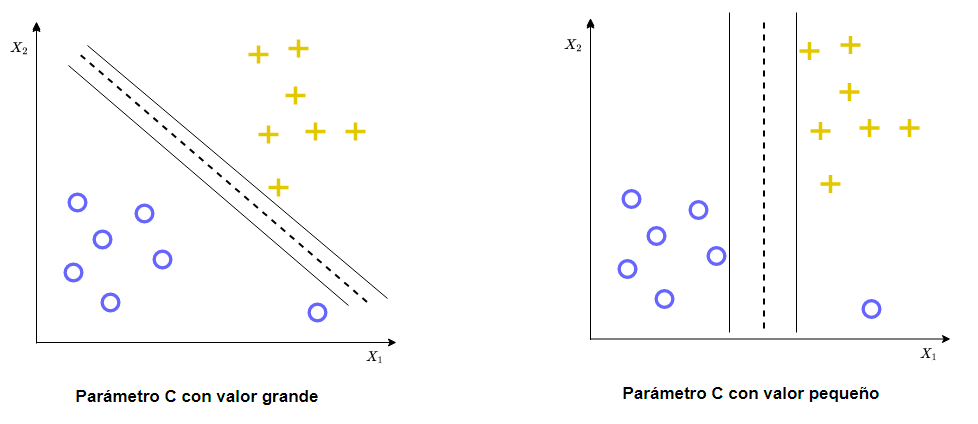

In [ ]:
display(Image(filename='./2_imagenes/SVM_2.png', width=700))

Es un modelo muy sensible a la diferencia de escalas de los atributos

A continuación vamos a usar las SVM con algunos datasets guardados en la carpeta `1_datos`

In [3]:
# importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from modulos.graficacion import plot_decision_regions

### Dataset Nº 1

In [4]:
# Dataset data1.mat
import scipy.io as sio
archivo_mat = sio.loadmat('1_datos/data1.mat')

X = archivo_mat['X']
y = archivo_mat['y'].flatten()

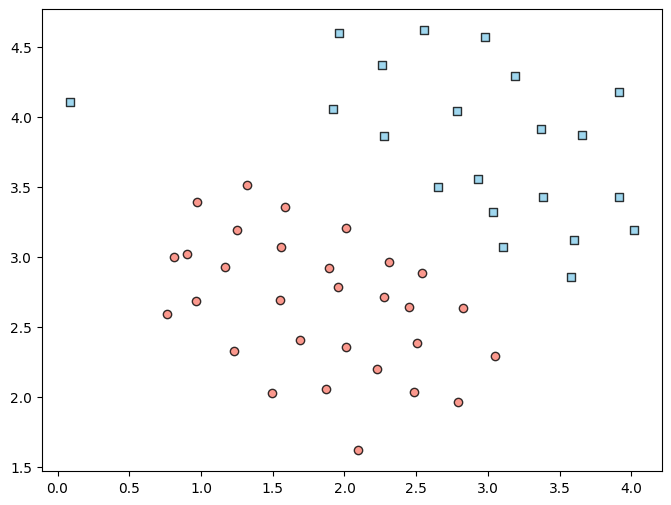

In [33]:
# Visualizamos los datos
markers = ('o', 's', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')
plt.show()

Este dataset es linealmente separable. Notar que se tiene un outlier en una de las clases.

Probar con diferentes valores del parámetro C de la clase [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) de scikit-learn y ver qué efecto tiene la presencia del outlier en la región de separación.

**DIVISION DE LOS DATOS PARA GRAFICAR Y SU TRASFORMACION (ESCALACION)**

In [34]:
from sklearn.model_selection import train_test_split


# Escalamos los datos
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X)

X = std_scaler.transform(X)

# division de los datos en test y prueba mas las etiquetas
X_train, X_test, Etiquetas_train, Etiquetas_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42,  stratify = y)

**TIPOS DE OBJETOS QUE RECIBE LA FUNCION PARA GRAFICAR PLOT_DECISION_REGIONS_CUSTOM**

In [38]:
print(type(X_train))
print(type(X_test))
print(type(Etiquetas_train))
print(type(Etiquetas_test))

Etiquetas_train = pd.Series(Etiquetas_train)
Etiquetas_test = pd.Series(Etiquetas_test)

print(type(Etiquetas_train))
print(type(Etiquetas_test))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


**GRAFICO DEL MEJOR SVM (ENCONTRADO CON GRIDSERCH (ABAJO))**

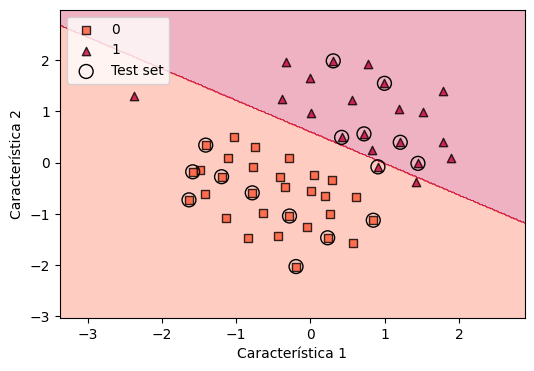

In [39]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions_custom(X_train, X_test, y_train, y_test, clasificador, resolution=0.02):
    
    # Combinar los datos de entrenamiento y prueba
    X_combined = np.vstack((X_train, X_test))
    y_combined = pd.concat([y_train, y_test], axis=0)
    
    # Crear los índices de las muestras de prueba
    test_idx = range(len(y_train), len(y_combined))

    # Marcadores y mapas de colores
    markers = ('s', '^', 'o', 'x', 'v')
    colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#DAF7A6']
    cmap = ListedColormap(colors[:len(np.unique(y_combined))])

    # Superficie de decisión
    x1_min, x1_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
    x2_min, x2_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Dibujar la superficie de decisión
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Graficar todas las muestras según su clase con distintos marcadores y colores
    for idx, cl in enumerate(np.unique(y_combined)):
        plt.scatter(x=X_combined[y_combined == cl, 0], 
                    y=X_combined[y_combined == cl, 1],
                    alpha=0.8, 
                    c=np.array([colors[idx]]), 
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # Resaltar las muestras de prueba
    X_test_highlight = X_combined[test_idx, :]
    plt.scatter(X_test_highlight[:, 0],
                X_test_highlight[:, 1],
                c='None',
                edgecolor='black',
                alpha=1.0,
                linewidth=1,
                marker='o',
                s=100, 
                label='Test set')

    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.legend(loc='upper left')
    plt.show()

svm1 = SVC(C=0.1 , kernel='linear')
svm1.fit(X_train, Etiquetas_train) 

# Graficar la frontera de decisión con los datos de entrenamiento y prueba
plt.figure(figsize=(6, 4))
plot_decision_regions_custom(X_train, X_test, Etiquetas_train, Etiquetas_test, clasificador=svm1)



In [131]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Asegúrate de que Etiquetas_train sea un array unidimensional
Etiquetas_train1 = Etiquetas_train.values.ravel()

# Definir los valores de C a probar
param_grid = {
    'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
}

# Crear un clasificador SVM con kernel lineal
svm = SVC(kernel='linear')

# Configurar GridSearchCV con validación cruzada de 5 particiones
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(X_train, Etiquetas_train1)

# Obtener los mejores parámetros y el mejor puntaje promedio
mejores_parametros = grid_search.best_params_
mejor_puntaje = grid_search.best_score_

# Mostrar los mejores parámetros y el puntaje correspondiente
print(f"Mejor valor de C: {mejores_parametros['C']}")
print(f"Mejor puntaje promedio: {mejor_puntaje:.2f}")



Mejor valor de C: 0.1
Mejor puntaje promedio: 0.94


### Dataset Nº 2
### SVM con kernel Gaussiano

In [5]:
# Dataset data2.mat
archivo_mat_2 = sio.loadmat('1_datos/data2.mat')
X_2 = archivo_mat_2['X']
y_2 = archivo_mat_2['y'].flatten()
X_2.shape

(863, 2)

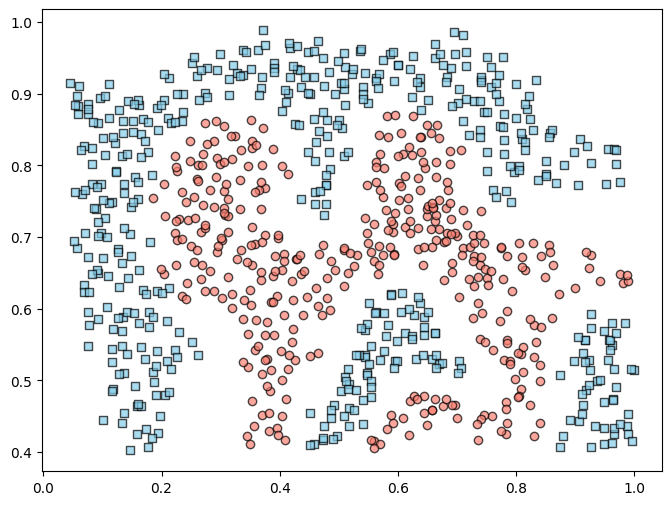

In [4]:
# Visualizamos los datos
markers = ('o', 's', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y_2)):
    plt.scatter(x=X_2[y_2 == cl, 0],
                y=X_2[y_2 == cl, 1],
                alpha=0.7,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

Como verá de la gráfica, los datos no son linealmente separables. Con el kernel Gaussiano, el algoritmo del SVM podrá encontrar la región de decisión capaz de separar los datos correctamente y seguir los contornos del dataset.

In [6]:
#Escalamos los datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
std_scaler.fit(X_2)

X_2 = std_scaler.transform(X_2)

# division de los datos en test y prueba mas las etiquetas
X_train2, X_test2, Etiquetas_train2, Etiquetas_test2 = train_test_split(X_2, y_2, test_size=0.3, shuffle=True, random_state=42,  stratify = y_2)

Uno de los _kernels_ más utilizado es el __radial basis function__ (RBF), que se conoce como __kernel Gaussiano__. Vea la documentación de la clase [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) para utilizar este kernel.

Un parámetro adicional al utilizar este kernel es el parámetro **gamma**. Este indica cuánta influencia tiene una sola muestra, haciendo que el límite de decisión se ajuste mucho más a las muestras. **Pruebe con diferentes valores de gamma para ver el efecto del mismo.**

La idea principal detrás del uso de _kernels_ con datos que no son linealmente separables, es crear combinaciones no lineales de las características originales y proyectarlas en un espacio de mayor dimensión (mapeo mediante una función), donde los datos se vuelven linealmente separables

In [8]:
print(type(X_train2))
print(type(X_test2))


Etiquetas_train2 = pd.Series(Etiquetas_train2)
Etiquetas_test2 = pd.Series(Etiquetas_test2)

print(type(Etiquetas_train2))
print(type(Etiquetas_test2))


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


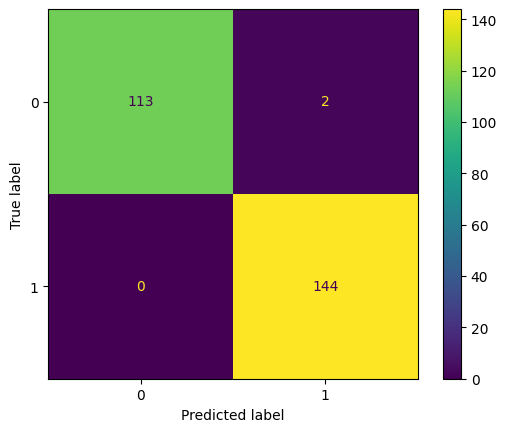

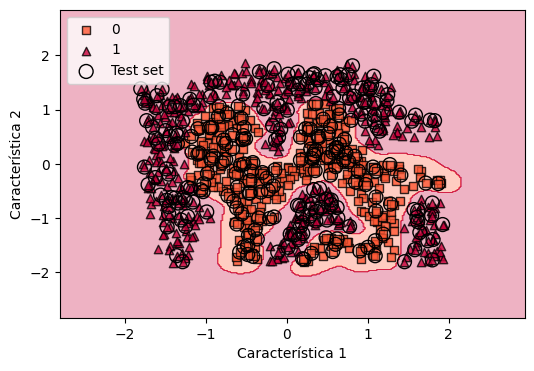

In [11]:
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

def plot_decision_regions_custom(X_train, X_test, y_train, y_test, clasificador, resolution=0.02):
    
    # Combinar los datos de entrenamiento y prueba
    X_combined = np.vstack((X_train, X_test))
    y_combined = pd.concat([y_train, y_test], axis=0)
    
    # Crear los índices de las muestras de prueba
    test_idx = range(len(y_train), len(y_combined))

    # Marcadores y mapas de colores
    markers = ('s', '^', 'o', 'x', 'v')
    colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#DAF7A6']
    cmap = ListedColormap(colors[:len(np.unique(y_combined))])

    # Superficie de decisión
    x1_min, x1_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
    x2_min, x2_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)
    
    # Dibujar la superficie de decisión
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Graficar todas las muestras según su clase con distintos marcadores y colores
    for idx, cl in enumerate(np.unique(y_combined)):
        plt.scatter(x=X_combined[y_combined == cl, 0], 
                    y=X_combined[y_combined == cl, 1],
                    alpha=0.8, 
                    c=np.array([colors[idx]]), 
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # Resaltar las muestras de prueba
    X_test_highlight = X_combined[test_idx, :]
    plt.scatter(X_test_highlight[:, 0],
                X_test_highlight[:, 1],
                c='None',
                edgecolor='black',
                alpha=1.0,
                linewidth=1,
                marker='o',
                s=100, 
                label='Test set')

    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.legend(loc='upper left')
    plt.show()

svm2 = SVC(C=1, gamma=30, kernel='rbf')
svm2.fit(X_train2, Etiquetas_train2) 
y_pred=svm2.predict(X_test2)
cm = confusion_matrix(Etiquetas_test2, y_pred)
# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#Entrenamos diferentes SVM y visualizamos el resultado con plot_decision_regions


# Graficar la frontera de decisión con los datos de entrenamiento y prueba
plt.figure(figsize=(6, 4))
plot_decision_regions_custom(X_train2, X_test2, Etiquetas_train2, Etiquetas_test2, clasificador=svm2)

In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC



# Definir los valores de C a probar
param_grid = {
    'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
    'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 300]
}

# Crear un clasificador SVM con kernel lineal
svm = SVC(kernel='rbf')

# Configurar GridSearchCV con validación cruzada de 5 particiones
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(X_train2, Etiquetas_train2)

# Obtener los mejores parámetros y el mejor puntaje promedio
mejores_parametros = grid_search.best_params_
mejor_puntaje = grid_search.best_score_

# Mostrar los mejores parámetros y el puntaje correspondiente
print(f"Mejor valor de C: {mejores_parametros['C']}")
print(f"Mejor valor de gamma: {mejores_parametros['gamma']}")
print(f"Mejor puntaje promedio: {mejor_puntaje}")


Mejor valor de C: 1
Mejor valor de gamma: 30
Mejor puntaje promedio: 0.990068870523416


### Dataset Nº 3
El siguiente dataset _data3.mat_ posee datos para entrenamiento (_X_, _y_) y datos de prueba (_X_test_, _y_test_)

In [8]:
# Dataset data2.mat
archivo_mat_3 = sio.loadmat('1_datos/data3.mat')
X_3 = archivo_mat_3['X']
y_3 = archivo_mat_3['y'].flatten()
X_test_3 = archivo_mat_3['Xval']
y_test_3 = archivo_mat_3['yval'].flatten()
print(X_3.shape)
print(X_test_3.shape)

(211, 2)
(200, 2)


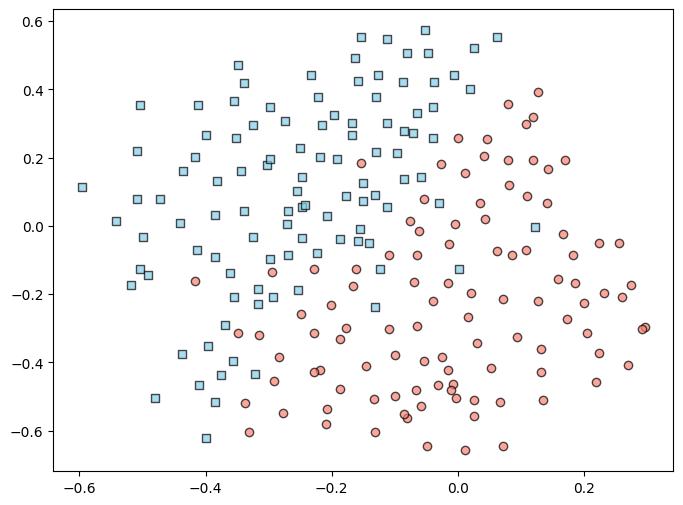

In [5]:
# Visualizamos los datos de entrenamiento
markers = ('o' ,'s', '^', 'v')
colors = ('salmon','skyblue','red', 'gray', 'cyan')
plt.figure(figsize=(8,6))
for idx, cl in enumerate(np.unique(y_3)):
    plt.scatter(x=X_3[y_3 == cl, 0],
                y=X_3[y_3 == cl, 1],
                alpha=0.7,
                c=colors[idx],
                marker=markers[idx],
                label=cl,
                edgecolor='black')

Este conjunto de datos no es linealmente separable. Una forma de obtener los mejores parámetros de una SVM para resolver este problema, es hacer una búsqueda en cuadrícula (GridSearch). Implemente un algoritmo que evalue SVMs con diferentes parámetros mediante validación cruzada (utilice la función [cross_val_score](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) con 5 particiones). Obtenga la combinación de valores de C y gamma que resulte en un mejor desempeño de la SVM.

In [6]:
sc = StandardScaler()
sc.fit(X_3)
X_3_std = sc.transform(X_3)
X_test_3_std = sc.transform(X_test_3)
X_3_std.shape

(211, 2)

**DOBLE FOR PARA ENCONTRAR EL MEJOR VALOR DE C Y GAMMA**

In [7]:


#------------------------------------

from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
import numpy as np

# Definir los valores de C y gamma a probar
valores_C = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100]
valores_gamma = [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 300]

# Crear variables para almacenar los mejores parámetros y el mejor puntaje
mejor_C = None
mejor_gamma = None
mejor_puntaje = 0

# Iterar sobre todos los valores de C y gamma
for C in valores_C:
    for gamma in valores_gamma:
        # Crear un clasificador SVM con los parámetros actuales
        svm = SVC(C=C, gamma=gamma, kernel='rbf')
        
        # Calcular el puntaje de validación cruzada con 5 particiones
        puntajes = cross_val_score(svm, X_3_std, y_3, cv=5)
        
        # Calcular el puntaje promedio
        puntaje_promedio = np.mean(puntajes)
        
        # Si el puntaje promedio es mejor que el mejor registrado, actualizar mejor puntaje y parámetros
        if puntaje_promedio > mejor_puntaje:
            mejor_puntaje = puntaje_promedio
            mejor_C = C
            mejor_gamma = gamma

# Mostrar los mejores parámetros encontrados
print(f"Mejor valor de C: {mejor_C}")
print(f"Mejor valor de gamma: {mejor_gamma}")
print(f"Mejor puntaje promedio: {mejor_puntaje}")



Mejor valor de C: 10
Mejor valor de gamma: 1
Mejor puntaje promedio: 0.9242524916943523


## Grid search usando sklearn

Repita el proceso anterior usando [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) de scikit-learn y compare los resultados obtenidos de C y gamma.

In [8]:
from sklearn.model_selection import GridSearchCV

#-----------------------------------------
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir los valores de C y gamma a probar
param_grid = {
    'C': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 100],
    'gamma': [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 300]
}

# Crear un clasificador SVM con kernel RBF
svm = SVC(kernel='rbf')

# Configurar GridSearchCV con validación cruzada de 5 particiones
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy')

# Ajustar el modelo a los datos
grid_search.fit(X_3_std, y_3)

# Obtener los mejores parámetros y el mejor puntaje promedio
mejores_parametros = grid_search.best_params_
mejor_puntaje = grid_search.best_score_

# Mostrar los mejores parámetros y el puntaje correspondiente
print(f"Mejor valor de C: {mejores_parametros['C']}")
print(f"Mejor valor de gamma: {mejores_parametros['gamma']}")
print(f"Mejor puntaje promedio: {mejor_puntaje}")



Mejor valor de C: 10
Mejor valor de gamma: 1
Mejor puntaje promedio: 0.9242524916943523


Con los valores de C y gamma obtenidos, entrene una SVM, grafique la frontera de decisión con `plot_decision_regions` mostrando los datos de entrenamiento y prueba y evalúe el desempeño obtenido con los datos de prueba.

In [22]:
import matplotlib.pyplot as plt
from modulos.graficacion import plot_decision_regions

# Entrenar el modelo SVM con los mejores parámetros obtenidos
mejor_C = 10
mejor_gamma = 1

svm_mejor = SVC(C=mejor_C, gamma=mejor_gamma, kernel='rbf')
svm_mejor.fit(X_3_std, y_3)

# Convertir y_3 a una Serie de pandas
y_3 = pd.Series(y_3, name='y_3')

# Convertir y_test_3 a una Serie de pandas
y_test_3 = pd.Series(y_test_3, name='y_test_3')

""" X_combined_std = np.vstack((X_3_std, X_test_3_std))
y_combined = np.hstack((y_3, y_test_3))
plt.figure(figsize=(8,6))
plot_decision_regions( X=X_combined_std, y=y_combined, clasificador=svm_mejor, resolution=0.05)
plt.xlabel('longitud de pétalo [standardized]')
plt.ylabel('ancho de pétalo [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show() """

" X_combined_std = np.vstack((X_3_std, X_test_3_std))\ny_combined = np.hstack((y_3, y_test_3))\nplt.figure(figsize=(8,6))\nplot_decision_regions( X=X_combined_std, y=y_combined, clasificador=svm_mejor, resolution=0.05)\nplt.xlabel('longitud de pétalo [standardized]')\nplt.ylabel('ancho de pétalo [standardized]')\nplt.legend(loc='upper left')\nplt.tight_layout()\nplt.show() "

**MATRIZ DE CONFUSION**

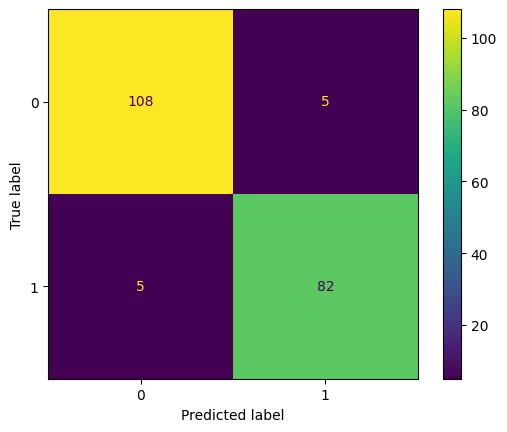

Accuracy: 0.95
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       113
           1       0.94      0.94      0.94        87

    accuracy                           0.95       200
   macro avg       0.95      0.95      0.95       200
weighted avg       0.95      0.95      0.95       200



In [20]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report

# Crear y entrenar el modelo SVC
#svc = SVC()
#svc.fit(X_3_std, y_3)

# Realizar predicciones en el conjunto de prueba
y_pred = svm_mejor.predict(X_test_3_std)

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_3, y_pred)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Calcular métricas
accuracy = accuracy_score(y_test_3, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generar un reporte de clasificación que incluye precisión, sensibilidad y F1-score para cada clase
print(classification_report(y_test_3, y_pred))


**GRAFICO DE FRONTERA DE DECISION**

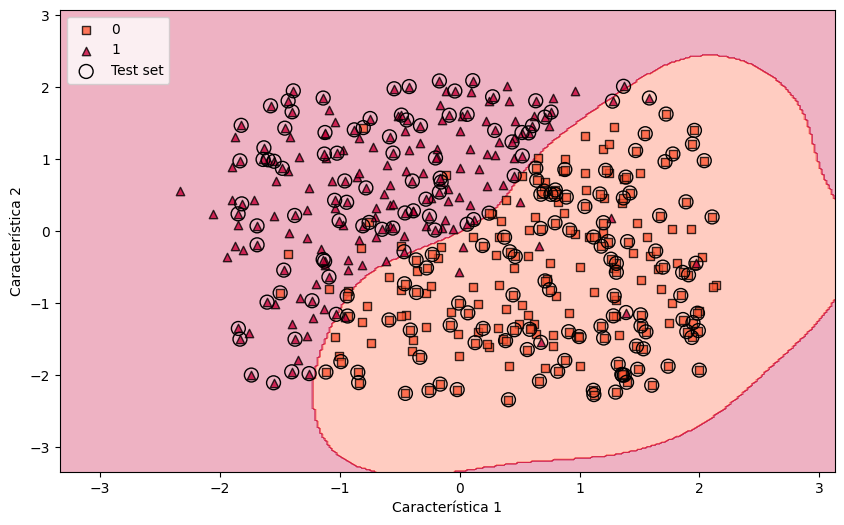

In [76]:
#Grafico la frontera de decisión, muestro los datos de entrenamiento y prueba
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#La funcion recibe x_Train y X_Test como numpy arrays y las etquietas como pa.series
def plot_decision_regions_custom(X_train, X_test, y_train, y_test, clasificador, resolution=0.02):
    
    # Combinar los datos de entrenamiento y prueba
    X_combined = np.vstack((X_train, X_test))
    y_combined = pd.concat([y_train, y_test], axis=0)
    
    # Crear los índices de las muestras de prueba
    test_idx = range(len(y_train), len(y_combined))

    # Marcadores y mapas de colores
    markers = ('s', '^', 'o', 'x', 'v')
    colors = ['#FF5733', '#C70039', '#900C3F', '#581845', '#DAF7A6']
    cmap = ListedColormap(colors[:len(np.unique(y_combined))])

    # Superficie de decisión
    x1_min, x1_max = X_combined[:, 0].min() - 1, X_combined[:, 0].max() + 1
    x2_min, x2_max = X_combined[:, 1].min() - 1, X_combined[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Dibujar la superficie de decisión
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Graficar todas las muestras según su clase con distintos marcadores y colores
    for idx, cl in enumerate(np.unique(y_combined)):
        plt.scatter(x=X_combined[y_combined == cl, 0], 
                    y=X_combined[y_combined == cl, 1],
                    alpha=0.8, 
                    c=np.array([colors[idx]]), 
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # Resaltar las muestras de prueba
    X_test_highlight = X_combined[test_idx, :]
    plt.scatter(X_test_highlight[:, 0],
                X_test_highlight[:, 1],
                c='None',
                edgecolor='black',
                alpha=1.0,
                linewidth=1,
                marker='o',
                s=100, 
                label='Test set')

    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.legend(loc='upper left')
    plt.show()

# Entrenar el modelo SVM con los mejores parámetros obtenidos
mejor_C = 10
mejor_gamma = 1

svm_mejor = SVC(C=mejor_C, gamma=mejor_gamma, kernel='rbf')
svm_mejor.fit(X_3_std, y_3)

# Graficar la frontera de decisión con los datos de entrenamiento y prueba
plt.figure(figsize=(10, 6))
plot_decision_regions_custom(X_3_std, X_test_3_std, y_3, y_test_3, clasificador=svm_mejor)



In [105]:
print(type(X_3_std))
print(type(X_test_3_std))
print(type(y_3))
print(type(y_test_3))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
